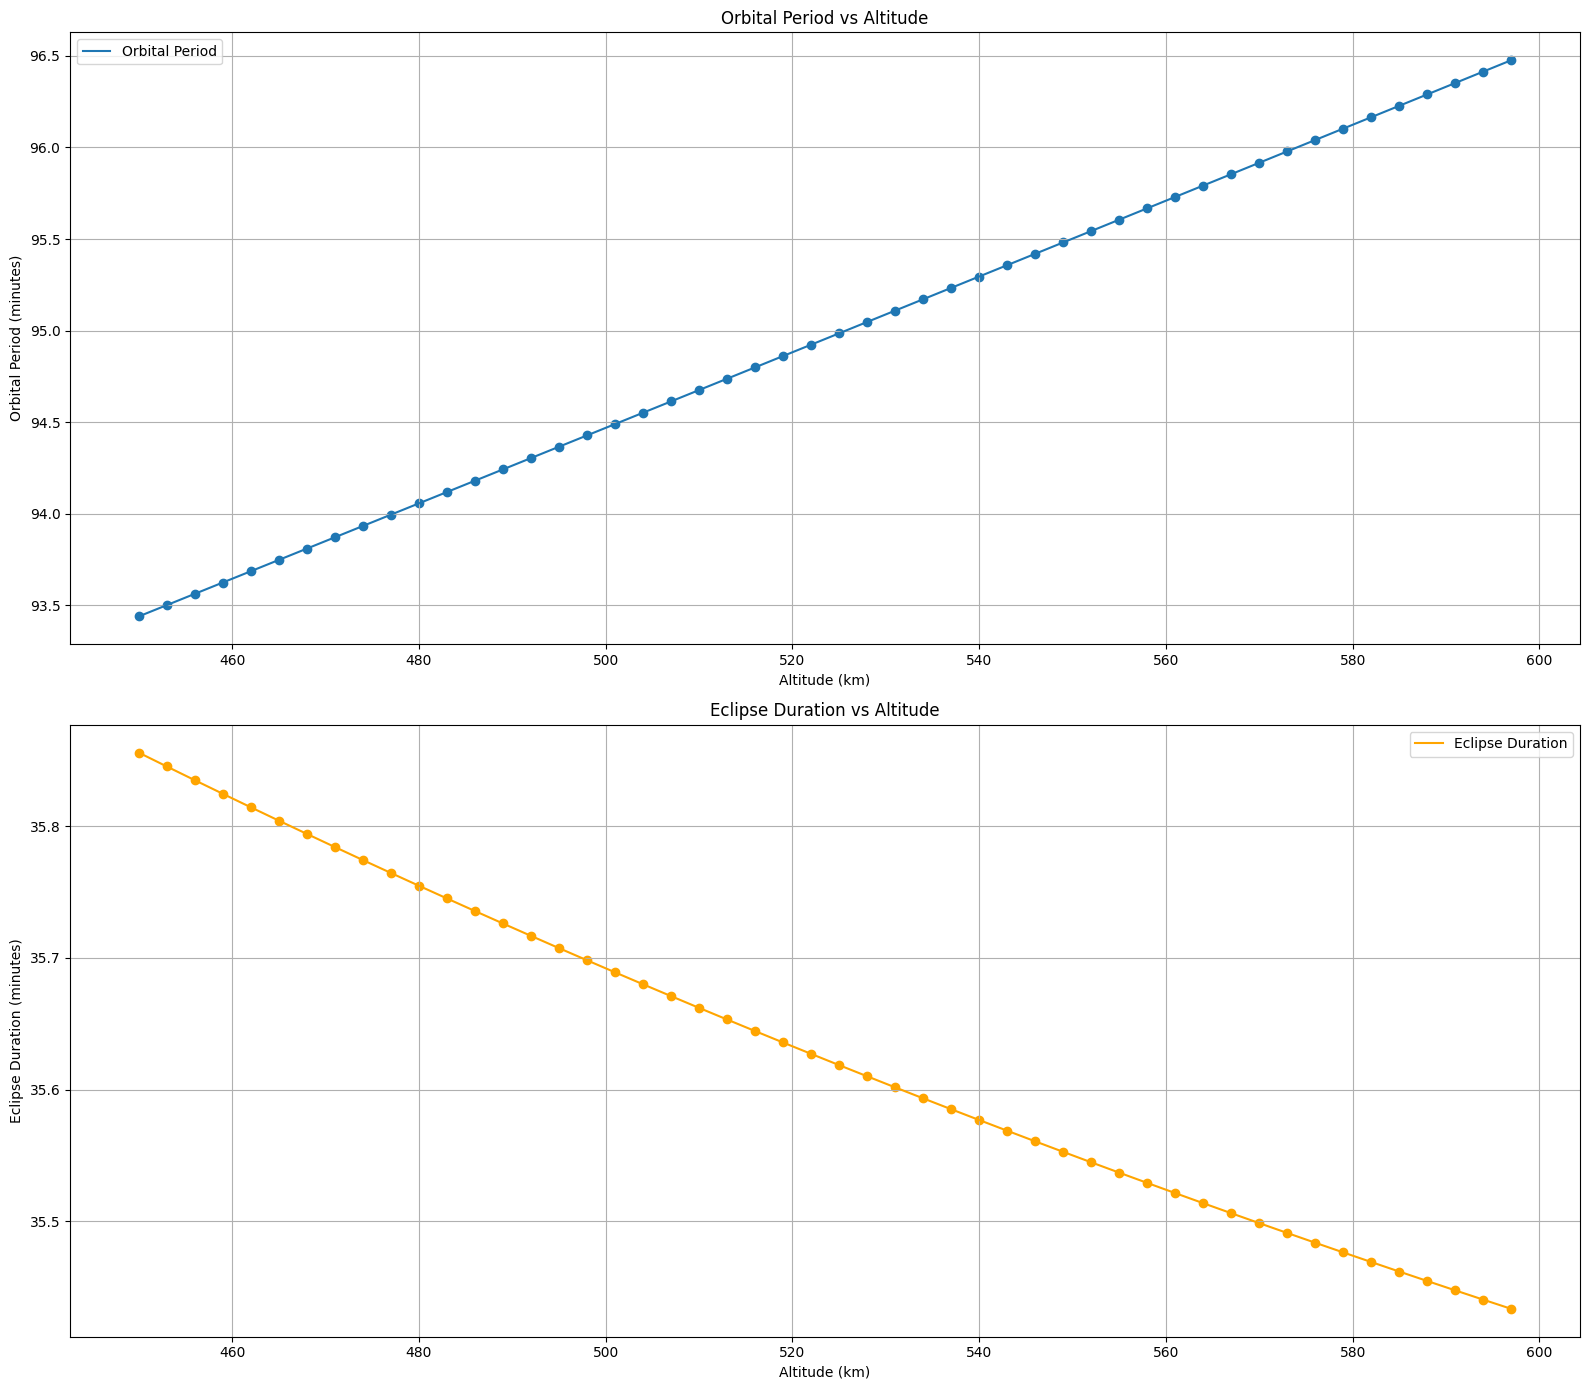

In [20]:
import numpy as np
import matplotlib.pyplot as plt

mu = 3.986e14
RE = 6371e3

altitudes_km = np.arange(450, 600, 3)
altitudes_m = altitudes_km * 1e3

orbital_periods = []
eclipse_durations = []

for altitude in altitudes_m:
    a = RE + altitude
    T = 2 * np.pi * np.sqrt(a**3 / mu)
    theta = np.arcsin(RE / a)
    alpha = 2 * theta
    f = alpha / (2 * np.pi)
    T_eclipse = f * T
    orbital_periods.append(T)
    eclipse_durations.append(T_eclipse)

orbital_periods_minutes = np.array(orbital_periods) / 60
eclipse_durations_minutes = np.array(eclipse_durations) / 60

plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
plt.plot(altitudes_km, orbital_periods_minutes, label='Orbital Period')
plt.scatter(altitudes_km, orbital_periods_minutes)
plt.xlabel('Altitude (km)')
plt.ylabel('Orbital Period (minutes)')
plt.title('Orbital Period vs Altitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(altitudes_km, eclipse_durations_minutes, label='Eclipse Duration', color='orange')
plt.scatter(altitudes_km, eclipse_durations_minutes, color='orange')
plt.xlabel('Altitude (km)')
plt.ylabel('Eclipse Duration (minutes)')
plt.title('Eclipse Duration vs Altitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Time Period

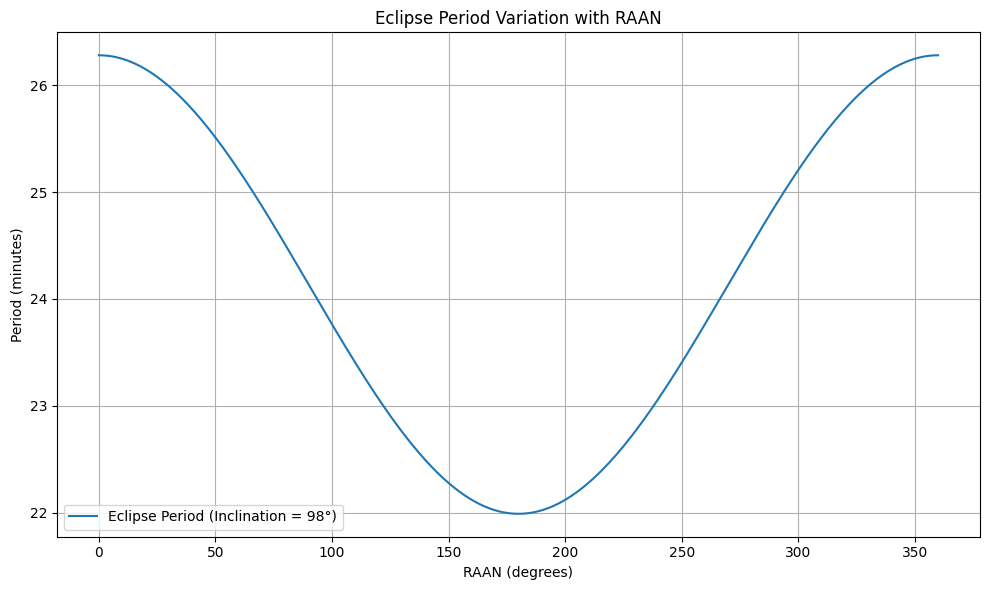

Maximum Eclipse Period: 26.28 minutes
Minimum Eclipse Period: 21.99 minutes
Total Orbital Period: 96.54 minutes


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
inclination = 98  # Inclination in degrees
mu = 3.986e5  # Gravitational parameter of the Earth in km^3/s^2

# Function to calculate orbital time period (in seconds)
def orbital_period(a):
    return 2 * np.pi * np.sqrt(a**3 / mu)

# Function to calculate eclipse period variation
def eclipse_period_variation(raan_degrees, a, inclination):
    # Convert RAAN to radians
    raan_rad = np.deg2rad(raan_degrees)
    
    # Calculate cosine of the angle between the satellite's position vector and the Sun-Earth line
    cos_angle = np.cos(np.deg2rad(inclination)) * np.cos(raan_rad)
    
    # Calculate eclipse period variation (example formula, you may adjust as per your specific model)
    eclipse_fraction = np.arccos(cos_angle) / (2 * np.pi)
    
    # Calculate orbital period
    T = orbital_period(a)
    
    # Multiply by fraction to get eclipse period
    eclipse_period = eclipse_fraction * T
    
    return eclipse_period

# Input from user: altitude (semi-major axis)
altitude_km = float(input("Enter altitude in kilometers: "))
semi_major_axis = altitude_km + 6371  # Earth's radius is 6371 km, adding altitude for semi-major axis

# RAAN values from 0 to 360 degrees
raan_values = np.linspace(0, 360, 361)  # Adjust step size as needed for accuracy

# Calculate eclipse periods for each RAAN
eclipse_periods_seconds = [eclipse_period_variation(raan, semi_major_axis, inclination) for raan in raan_values]
eclipse_periods_minutes = np.array(eclipse_periods_seconds) / 60.0  # Convert to minutes

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(raan_values, eclipse_periods_minutes, label=f'Eclipse Period (Inclination = {inclination}°)')
plt.title('Eclipse Period Variation with RAAN')
plt.xlabel('RAAN (degrees)')
plt.ylabel('Period (minutes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print max and min eclipse periods in minutes
max_eclipse_period_minutes = np.max(eclipse_periods_minutes)
min_eclipse_period_minutes = np.min(eclipse_periods_minutes)
print(f"Maximum Eclipse Period: {max_eclipse_period_minutes:.2f} minutes")
print(f"Minimum Eclipse Period: {min_eclipse_period_minutes:.2f} minutes")

# Calculate and print total orbital period
orbital_period_seconds = orbital_period(semi_major_axis)
orbital_period_minutes = orbital_period_seconds / 60.0
print(f"Total Orbital Period: {orbital_period_minutes:.2f} minutes")